### Transformation on Skewed Columns for Comparison and Highly Correlated Columns

#### Here data trasnformation will be done on skewed columns and highly correlated columns.

##### Correcting Skew
##### Key points to consider:
Spreadness of the Distribution
- If Skewness = 0, data is perfectly symmetrical / Normally Distributed
- If Skewness is less than -1 or greater +1, distribution is highly skewed
- If Skewness is between -1 and -0.5 or between 0.5 and 1, distribution is moderately skewed
- If Skewness is between -0.5 and 0.5 then it is approximately symmetric  

Let's check the skew in the Administrative column using a Q-Q plot.

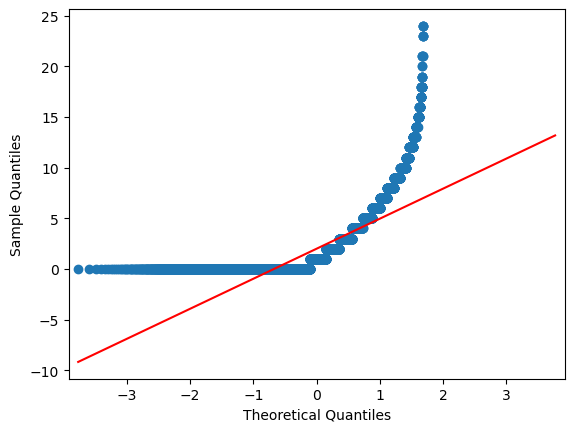

count    11760.000000
mean         2.308844
std          3.364905
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         24.000000
Name: administrative, dtype: float64

In [1]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import seaborn as sns


# scale Administrative: 
df = pd.read_csv('customer.csv')
qq_plot = qqplot(df['administrative'] , scale=1 ,line='q')
pyplot.show()
df['administrative'].describe()

The Administrative column skew is big, and has a big gap between the 3rd quartile and the max! Let's apply log transform to see if there is any difference:

Log transform for Administrative column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


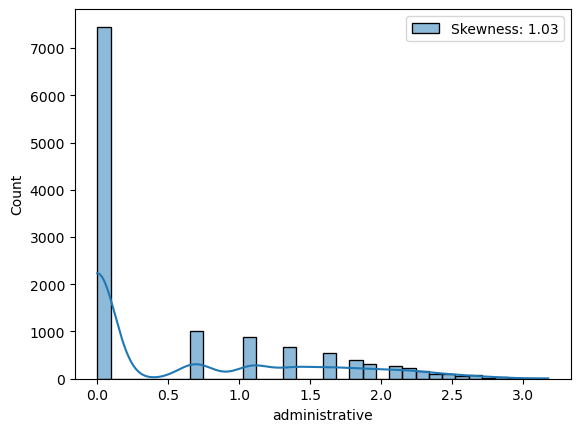

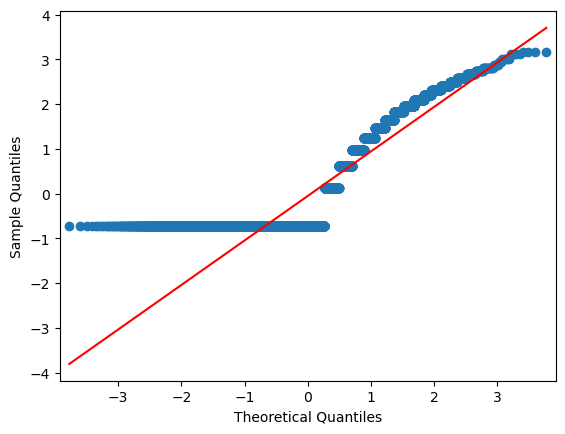

In [2]:
log_administrative = df['administrative'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_administrative,label="Skewness: %.2f"%(log_administrative.skew()), kde=True )
t.legend()
qq_plot = qqplot(log_administrative , scale=1 ,line='q', fit=True)
plt.show()

Well, Log transform is able to reduce the positive high skew in the Administrative column to a moderate skew of 1.03 according to our key points above. This is acceptable as it is within the skew range of 0.5 to 1.

Let's apply log transform on other skewed columns; Administrative_duration, informational, informational_duration, product_related, exit_rates, page_values, months, browser, and region are alos highly skewed like the Administrative column.

Log Transform for Administrative_duration column.

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


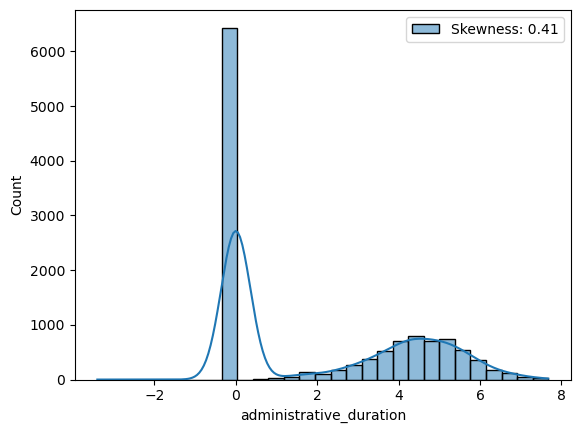

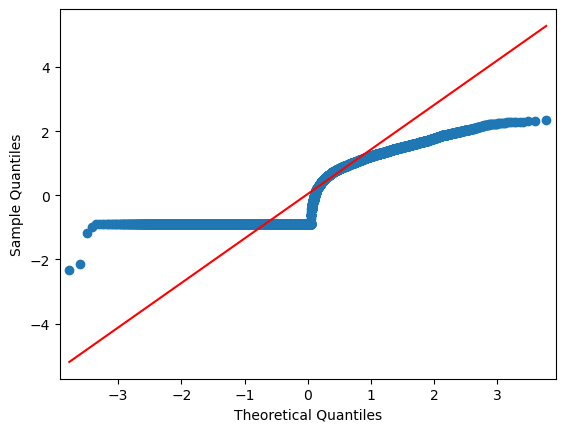

In [3]:
log_administrative_duration = df['administrative_duration'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_administrative_duration,label="Skewness: %.2f"%(log_administrative_duration.skew()), kde=True )
t.legend()
qq_plot = qqplot(log_administrative_duration , scale=1 ,line='q', fit=True)
plt.show()

Awesome, again log transform have greatly reduced the skew in the Administrative_duration column to 0.41 which is a normal distribution for skewness between 0 to 1, except for the outliers which will be look into later.

Log Transform for Informational column.

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


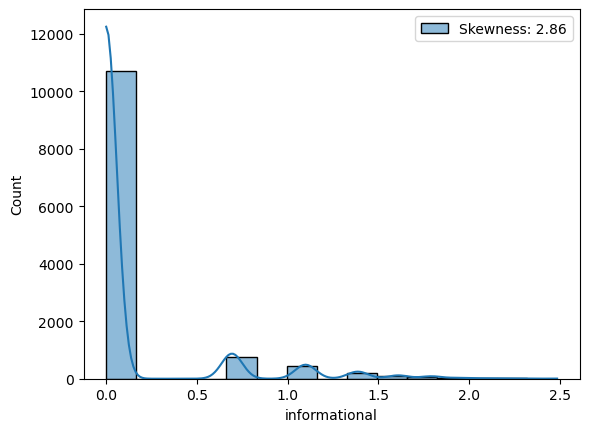

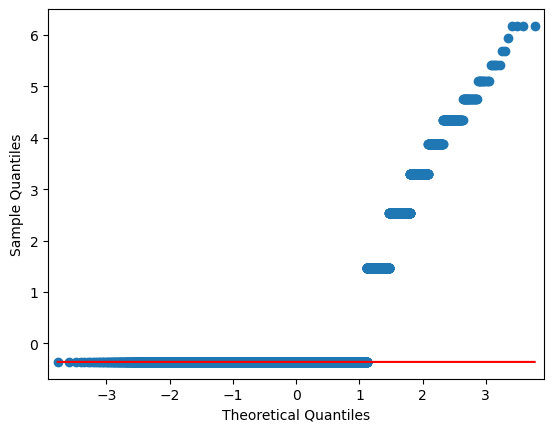

In [4]:
log_informational = df['informational'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_informational ,label="Skewness: %.2f"%(log_informational .skew()), kde=True )
t.legend()
qq_plot = qqplot(log_informational  , scale=1 ,line='q', fit=True)
plt.show()

Unfortunately, log transform could not reduce the skew in the Informational column rather increases it to 2.86 which is not within the range. Therefore, we will have to apply other transformation. Let's try Box-cox transformation since it is applicable to positive values.

Box-cox Transform for Informational Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


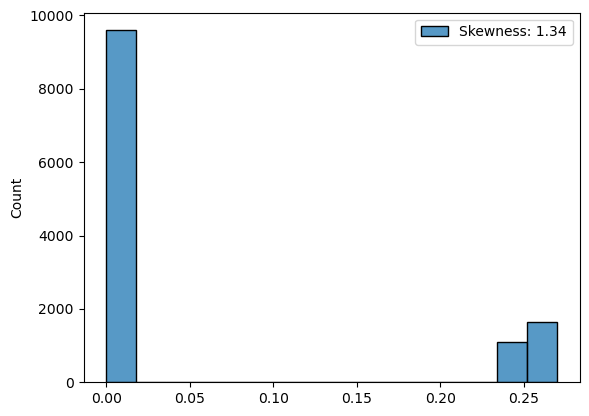

In [5]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Check if 'informational' column exists
if 'informational' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['informational'].fillna(df['informational'].median(), inplace=True)
    
  # Apply Box-Cox transformation
    boxcox_informational, _ = stats.boxcox(df["informational"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    boxcox_informational = pd.Series(boxcox_informational)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(boxcox_informational, label="Skewness: %.2f" % boxcox_informational.skew())
    t.legend()
    plt.show()
else:
    print("Column 'informational' does not exist in the DataFrame.")

Super!, Box-cox transform completely reduced the skewness from 2.86 to -0.00 which is a normal distribution.

Log Transform for Informational_duration

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


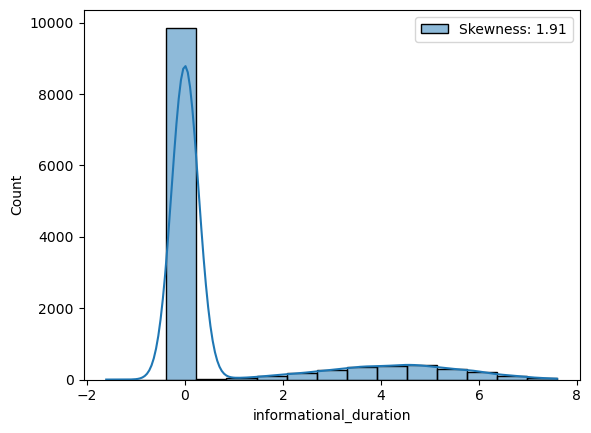

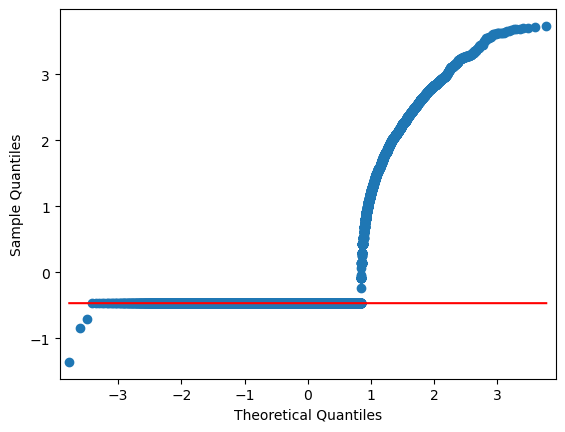

In [6]:
log_informational_duration = df['informational_duration'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_informational_duration ,label="Skewness: %.2f"%(log_informational_duration .skew()), kde=True )
t.legend()
qq_plot = qqplot(log_informational_duration, scale=1 ,line='q', fit=True)
plt.show()

Well, looks like the log transform didn't do good job in reducing the skewness in the Informational_duration. Let's apply box-cox transform and see what it can do.

Box-cox Transform on Informational_duration

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


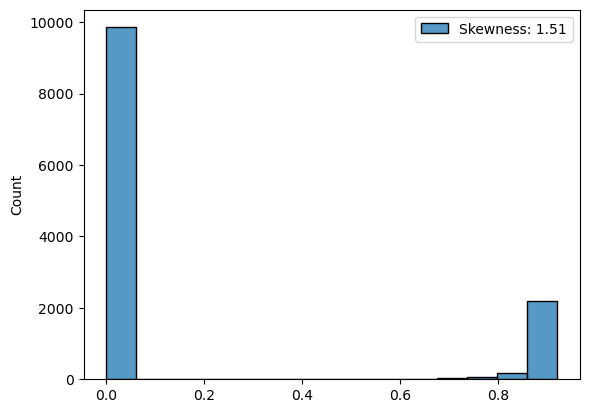

In [7]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Check if 'informational_duration' column exists
if 'informational_duration' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['informational_duration'].fillna(df['informational_duration'].median(), inplace=True)
    
  # Apply Box-Cox transformation
    boxcox_informational_duration, _ = stats.boxcox(df["informational_duration"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    boxcox_informational_duration = pd.Series(boxcox_informational_duration)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(boxcox_informational_duration, label="Skewness: %.2f" % boxcox_informational_duration.skew())
    t.legend()
    plt.show()
else:
    print("Column 'informational_duration' does not exist in the DataFrame.")

Box-cox transform was able to reduce the skewness to 1.52 which is still high. Let's try Yeojohnson transform.

Yeojohnson Transform for Informational_duration

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


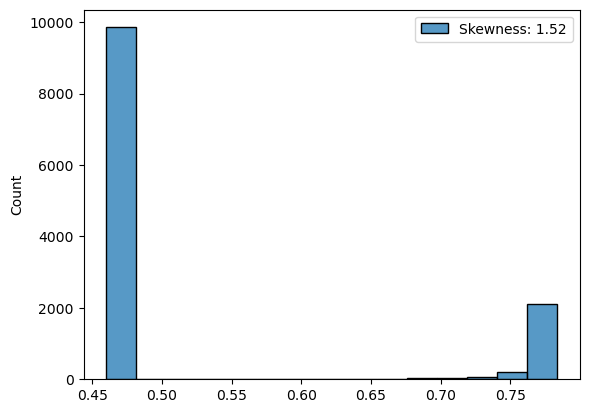

In [8]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Check if 'informational_duration' column exists
if 'informational_duration' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['informational_duration'].fillna(df['informational_duration'].median(), inplace=True)
    
  # Apply Box-Cox transformation
    yeojohnson_informational_duration, _ = stats.yeojohnson(df["informational_duration"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    yeojohnson_informational_duration = pd.Series(yeojohnson_informational_duration)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(yeojohnson_informational_duration, label="Skewness: %.2f" % yeojohnson_informational_duration.skew())
    t.legend()
    plt.show()
else:
    print("Column 'informational_duration' does not exist in the DataFrame.")

Yeojohnson rather increases the skewness by 1 from 1.51 of box-cox transform to 1.52. Looks like there's not much can be done on this Informational_duration Column. We will adopt box-cox transform for this column since it is slightly lower than other transform methods.

Log Transformation on Weekend

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


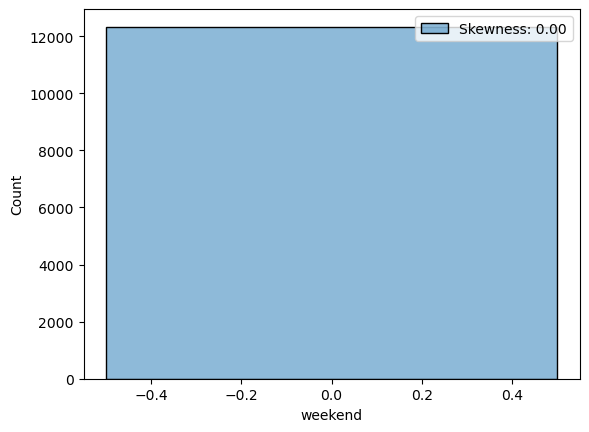

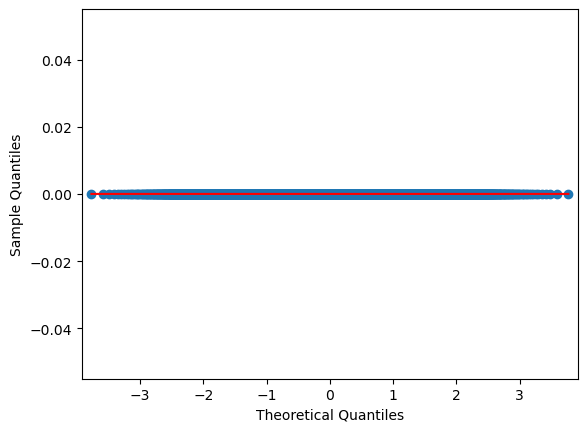

In [9]:
log_weekend = df['weekend'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_weekend ,label="Skewness: %.2f"%(log_weekend .skew()), kde=True )
t.legend()
qq_plot = qqplot(log_weekend, scale=1 ,line='q', fit=True)
plt.show()

Applying log transformation on Weekend column generate Skewness of 0, data is perfectly symmetrical / Normally Distributed. Let's apply to revenue which is the same dataset with weekend.


Log Transformation on Revenue

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


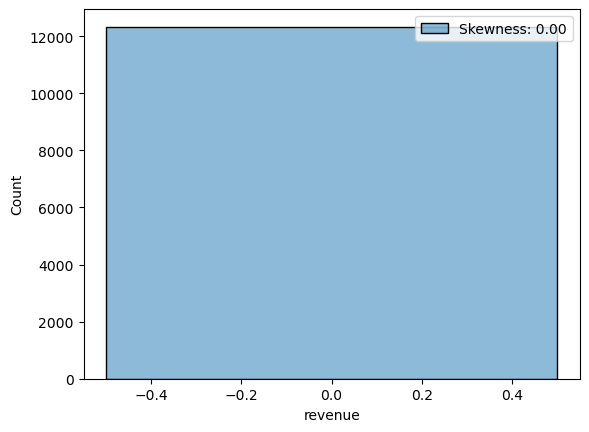

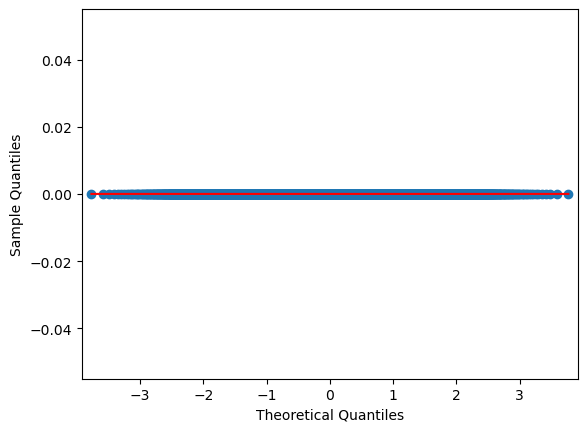

In [10]:
log_revenue = df['revenue'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_revenue ,label="Skewness: %.2f"%(log_revenue .skew()), kde=True )
t.legend()
qq_plot = qqplot(log_revenue, scale=1 ,line='q', fit=True)
plt.show()

Excellent, log transformation on Revenue column as predicted generate Skewness of 0, data is perfectly symmetrical / Normally Distributed.

Log Transform on Product_related Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


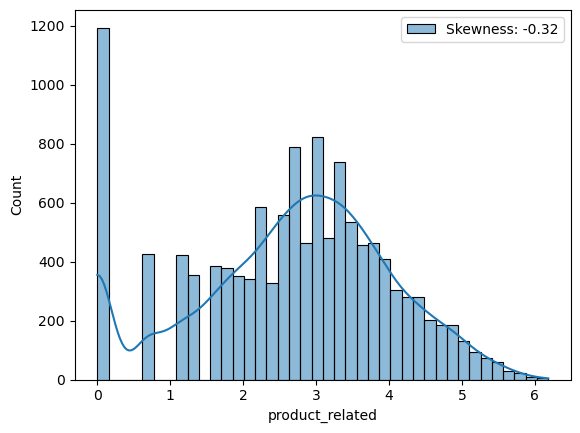

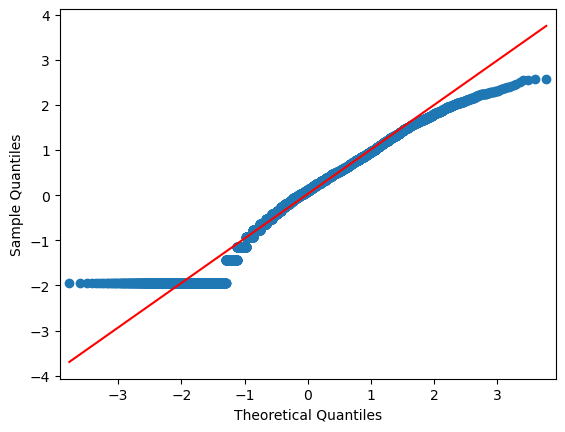

In [11]:
log_product_related = df['product_related'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_product_related ,label="Skewness: %.2f"%(log_product_related .skew()), kde=True )
t.legend()
qq_plot = qqplot(log_product_related, scale=1 ,line='q', fit=True)
plt.show()

Again, log transform works well on Product_related column by reducing the skewness to -0.30 which is a normal distribution. Let's compare with box-cox transform

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


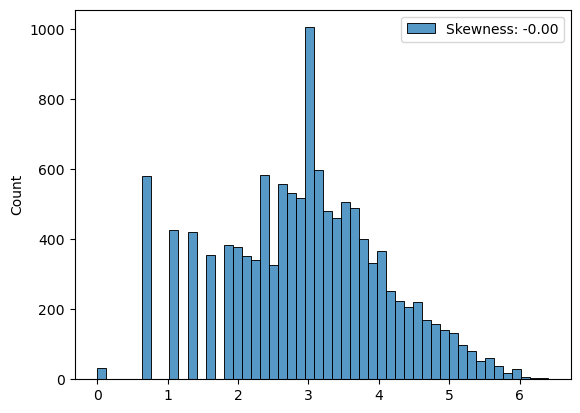

In [12]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Check if 'Product_Related' column exists
if 'product_related' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['product_related'].fillna(df['product_related'].median(), inplace=True)
    
    # Apply Box-Cox transformation
    boxcox_product_related, _ = stats.boxcox(df["product_related"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    boxcox_product_related = pd.Series(boxcox_product_related)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(boxcox_product_related, label="Skewness: %.2f" % boxcox_product_related.skew())
    t.legend()
    plt.show()
else:
    print("Column 'product_related' does not exist in the DataFrame.")

Great! With Box-cox transform the skewness is completely reduced to zero giving us a perfect and normal data distribution. 

Log Transform for Exit_rates

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


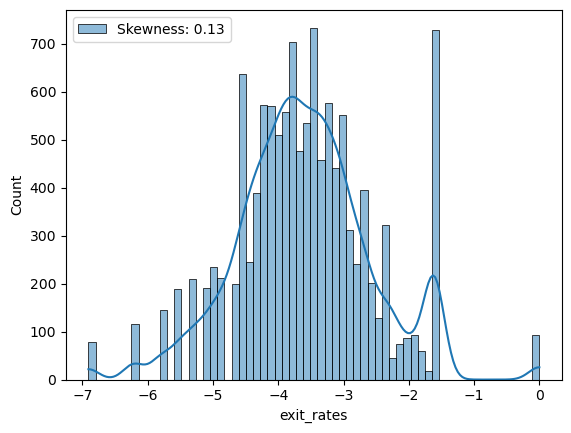

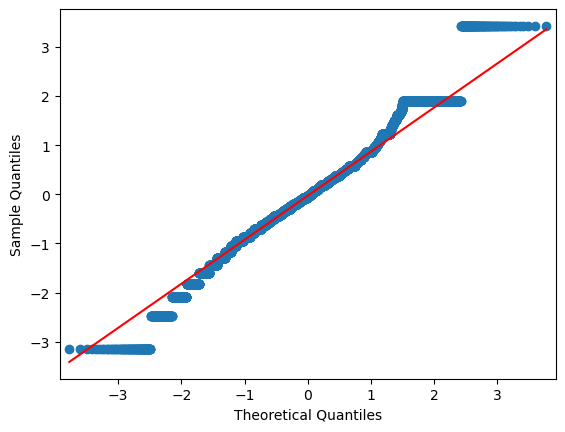

In [13]:
log_exit_rates = df['exit_rates'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_exit_rates ,label="Skewness: %.2f"%(log_exit_rates .skew()), kde=True )
t.legend()
qq_plot = qqplot(log_exit_rates, scale=1 ,line='q', fit=True)
plt.show()

Excellent! Log transform did an amazing reduction of skewness on the Exit_rates column to 0.13.This is normal and acceptable. Lets's apply log transform on page-values column.

Log Transform on Page_values Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


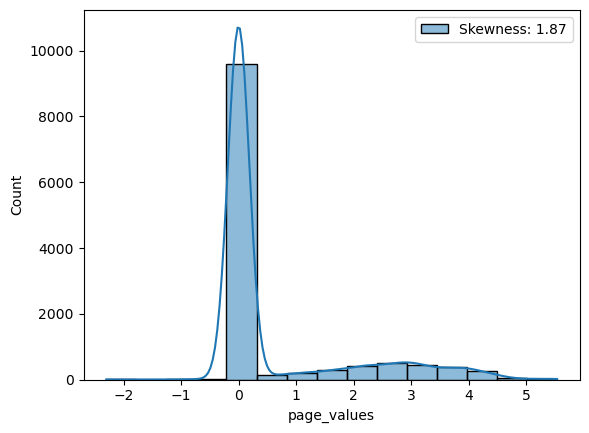

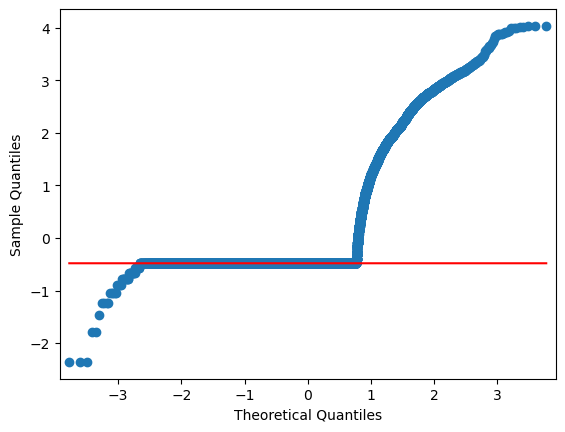

In [14]:
log_page_values = df['page_values'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_page_values  ,label="Skewness: %.2f"%(log_page_values  .skew()), kde=True )
t.legend()
qq_plot = qqplot(log_page_values , scale=1 ,line='q', fit=True)
plt.show()

Well, that didn't turn out well with the log transform on Page_values column. Skewness of 1.87 is high, let's apply box-cox transform.

Box-Cox Transform on Page_values Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


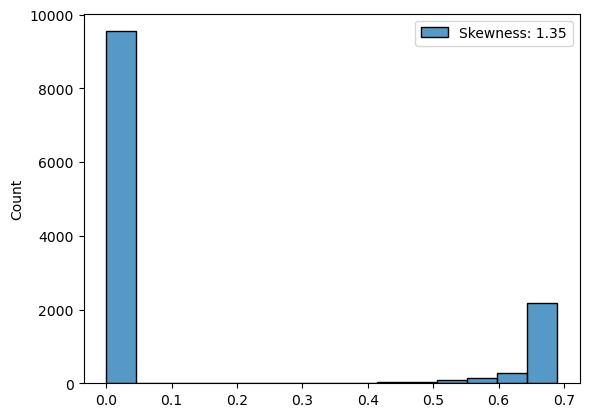

In [15]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Check if 'page_values' column exists
if 'page_values' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['page_values'].fillna(df['page_values'].median(), inplace=True)
    
    # Apply Box-Cox transformation
    boxcox_page_values, _ = stats.boxcox(df["page_values"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    boxcox_page_values = pd.Series(boxcox_page_values)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(boxcox_page_values, label="Skewness: %.2f" % boxcox_page_values.skew())
    t.legend()
    plt.show()
else:
    print("Column 'page_values' does not exist in the DataFrame.")

Atleast, Box-cox is able to reduce the skewness from 1.87 to 1.35 even it's still high. Let's apply YeoJohnson transform.

Yeojohnson Transform on Page_values column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


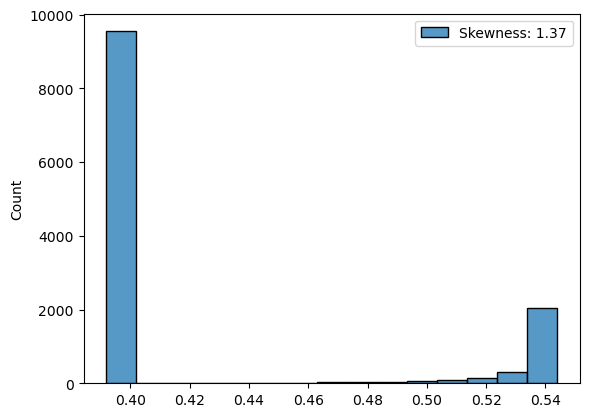

In [16]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



# Check if 'page_values' column exists
if 'page_values' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['page_values'].fillna(df['page_values'].median(), inplace=True)
    
  # Apply Box-Cox transformation
    yeojohnson_page_values, _ = stats.yeojohnson(df["page_values"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    yeojohnson_page_values = pd.Series(yeojohnson_page_values)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(yeojohnson_page_values, label="Skewness: %.2f" % yeojohnson_page_values.skew())
    t.legend()
    plt.show()
else:
    print("Column 'page_values' does not exist in the DataFrame.")

Well, Yeojohnson transform didn't make any difference rather increases the skewness by 2 from 1.35 of box-cox transform to 1.37. At this point, not much can be done on the page_values except the outliers which will be look into later. Therefore, we will adopt the box-cox transform for the skewness reduction on page_values column because the skewness reduction in box-cox transform is slighlty lesser than other transform methods.

## Removing Outliers

In histograms, outliers can often be identified as isolated bars that are separated from the main cluster of data, indicating values that are significantly different from the majority. Let's visualized data on columns for outliers using histogram.

Histogram for Administrative Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


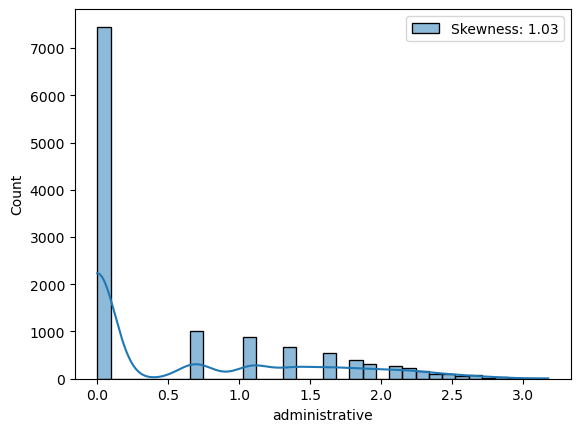

In [17]:
log_administrative = df['administrative'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_administrative,label="Skewness: %.2f"%(log_administrative.skew()), kde=True )
t.legend()
plt.show()

In the above histogram for Administrative column, the outlier is visible at the far left (0.0, 7500).

Histogram for Administrative_duration Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


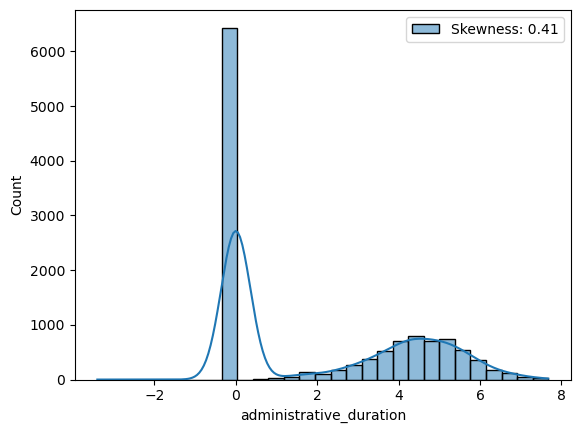

In [18]:
log_administrative_duration = df['administrative_duration'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_administrative_duration,label="Skewness: %.2f"%(log_administrative_duration.skew()), kde=True )
t.legend()
# qq_plot = qqplot(log_administrative_duration , scale=1 ,line='q', fit=True)
plt.show()

The outlier in the Administrative_duration column is the bar at the left (0,6500)

Histogram for Informational Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


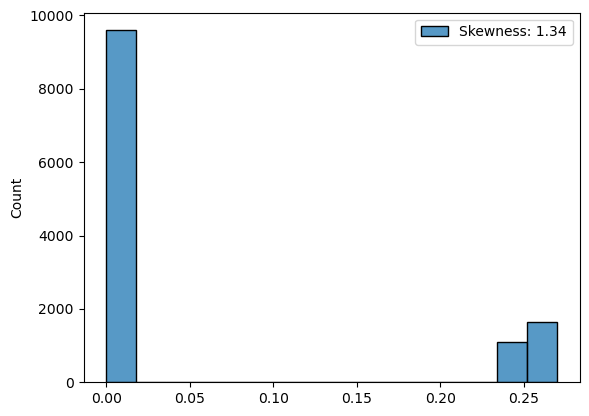

In [19]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Check if 'informational' column exists
if 'informational' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['informational'].fillna(df['informational'].median(), inplace=True)
    
  # Apply Box-Cox transformation
    boxcox_informational, _ = stats.boxcox(df["informational"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    boxcox_informational = pd.Series(boxcox_informational)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(boxcox_informational, label="Skewness: %.2f" % boxcox_informational.skew())
    t.legend()
    plt.show()
else:
    print("Column 'informational' does not exist in the DataFrame.")

This is a clear visibility of outlier on the Informational column, the bar at the far left (0.00, 900) is the outlier. 

Histogram for Informational_duration Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


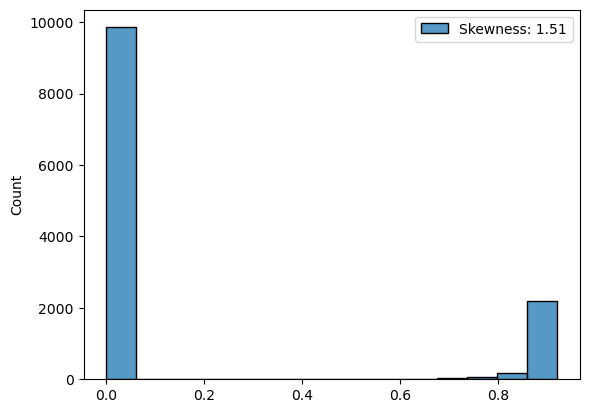

In [20]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



# Check if 'informational_duration' column exists
if 'informational_duration' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['informational_duration'].fillna(df['informational_duration'].median(), inplace=True)
    
  # Apply Box-Cox transformation
    boxcox_informational_duration, _ = stats.boxcox(df["informational_duration"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    boxcox_informational_duration = pd.Series(boxcox_informational_duration)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(boxcox_informational_duration, label="Skewness: %.2f" % boxcox_informational_duration.skew())
    t.legend()
    plt.show()
else:
    print("Column 'informational_duration' does not exist in the DataFrame.")

Same as the Informational column, the outlier is the bar at the far left (0.0, 9950). This bar is isolated from the cluster bars at the far right.

Histogram of Product_related Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


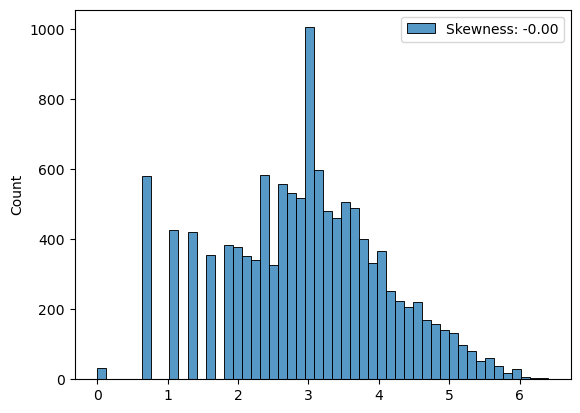

In [21]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Check if 'Product_Related' column exists
if 'product_related' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['product_related'].fillna(df['product_related'].median(), inplace=True)
    
    # Apply Box-Cox transformation
    boxcox_product_related, _ = stats.boxcox(df["product_related"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    boxcox_product_related = pd.Series(boxcox_product_related)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(boxcox_product_related, label="Skewness: %.2f" % boxcox_product_related.skew())
    t.legend()
    plt.show()
else:
    print("Column 'product_related' does not exist in the DataFrame.")

The histogram for product_related column shows an isolated bar at the are left (0,10) which is the outlier.

Histogram for Exit_rates Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


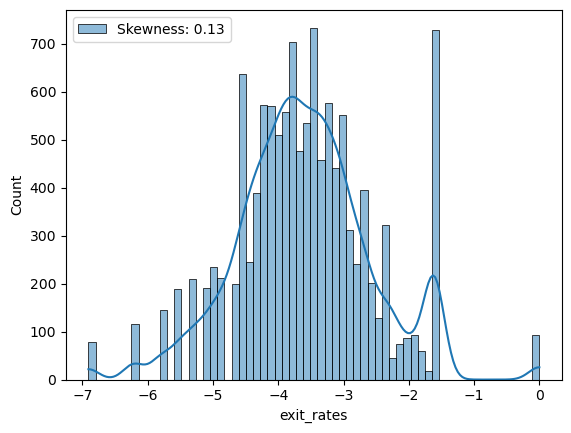

In [22]:
log_exit_rates = df['exit_rates'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_exit_rates ,label="Skewness: %.2f"%(log_exit_rates .skew()), kde=True )
t.legend()
plt.show()

Here we have two outliers which are the two bars at the far left (-7,90) and (0,100) on the exit_rates column.

Histogram for Page_values Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


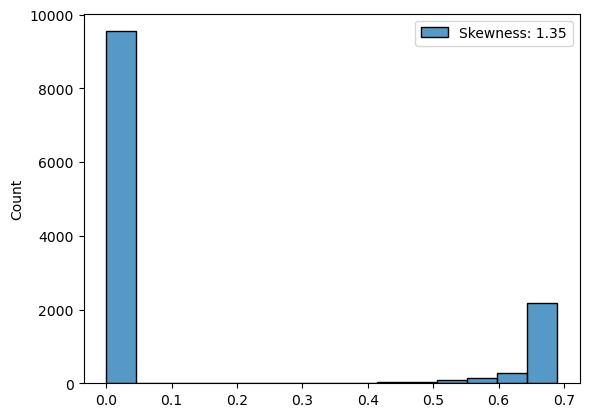

In [23]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Check if 'page_values' column exists
if 'page_values' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['page_values'].fillna(df['page_values'].median(), inplace=True)
    
    # Apply Box-Cox transformation
    boxcox_page_values, _ = stats.boxcox(df["page_values"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    boxcox_page_values = pd.Series(boxcox_page_values)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(boxcox_page_values, label="Skewness: %.2f" % boxcox_page_values.skew())
    t.legend()
    plt.show()
else:
    print("Column 'page_values' does not exist in the DataFrame.")

Great! We can identify the outlier as the isolated bar(0.0, 9950) on the dar left of the page_values column.

## Transformation/Removal of Outliers

Now that the outliers has been identified on the affected columns, next is to either transform or remove the outliers in those columns. We will use two different methods; Interquartile(IQR) and Box Plot methods for better visualization. Let's start with the Administrative Column using IQR method to remove the outlier and then visualized the output on an histogram .

IQR and Histogram for Administrative Column

nan


<Axes: >

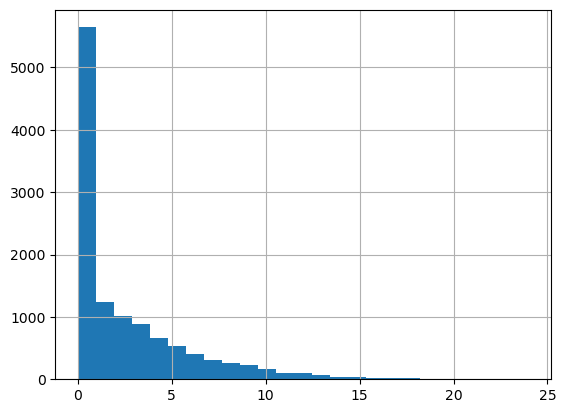

In [24]:
# IQR
Q1 = np.percentile(df['administrative'], 25, method='midpoint')
Q3 = np.percentile(df['administrative'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

df['administrative'].hist(bins=25)


Great! The histogram for the administrative column shows a normal distribution with no outliers. No isolated bar, all bars are clustered together which means outliers has been successfully removed.

Box Plot for Administrative_duration Column

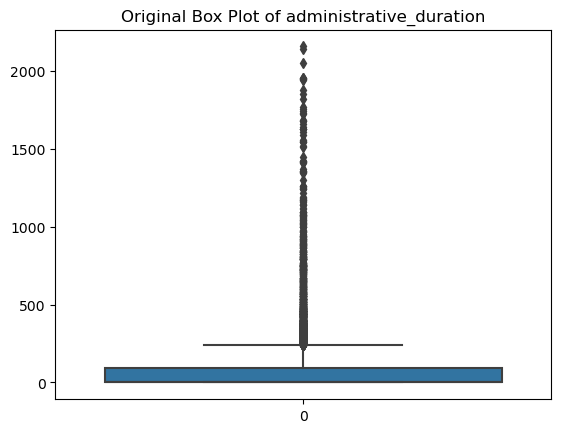

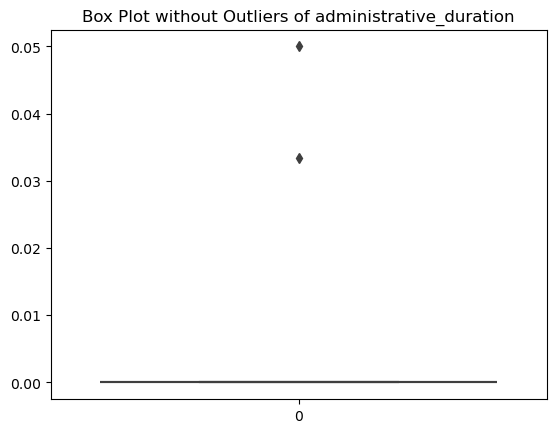

In [25]:
df = pd.read_csv('customer.csv')
import seaborn as sns
import matplotlib.pyplot as plt
 
 
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
 
 
threshold_value = 0.20
 
no_outliers = removal_box_plot(df, 'administrative_duration', threshold_value)

IQR and Histogram for Administrative _duration Column

nan


<Axes: >

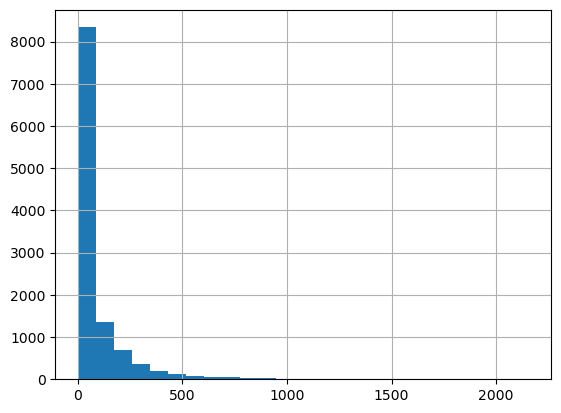

In [26]:
# IQR
Q1 = np.percentile(df['administrative_duration'], 25, method='midpoint')
Q3 = np.percentile(df['administrative_duration'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

df['administrative_duration'].hist(bins=25)

Comparing the two methods plots above box plot and IQR after the removal of outlier, the histogram from the IQR method present a better visualization for a successful removal of outlier. As mentioned before all bars are clustered together, no isolated bar therefore, no outliers.

IQR and Histogram Plot for Informational Column

0.0


<Axes: >

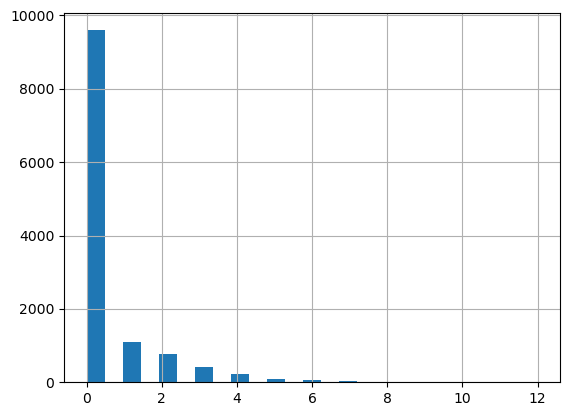

In [27]:

# IQR
Q1 = np.percentile(df['informational'], 25, method='midpoint')
Q3 = np.percentile(df['informational'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

df['informational'].hist(bins=25)

The Informational column on the histogram shows an evenly distributed bars and not isolated bar. This means the outliers have been successfully removed using the IQR method

IQR and Histogram for Informational_duration Column

nan


<Axes: >

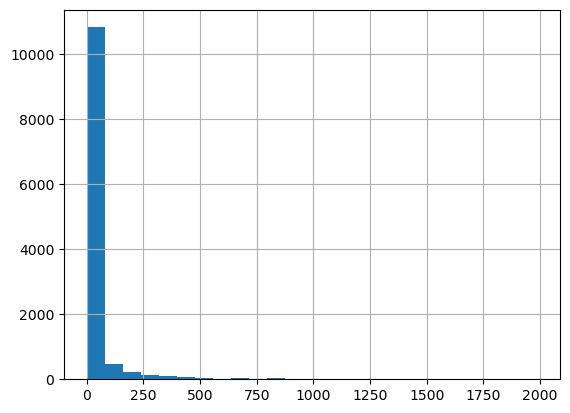

In [28]:
# IQR
Q1 = np.percentile(df['informational_duration'], 25, method='midpoint')
Q3 = np.percentile(df['informational_duration'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

df['informational_duration'].hist(bins=25)

Outliers in the informational_duration has not been completely removed but corrected as shown in the histogram above. The two isolated bars (0,750), (0,800) are not too far off from the clustered bars compare to previous shape in after skew transformation.

IQR and Histogram for Product_related Column.

nan


<Axes: >

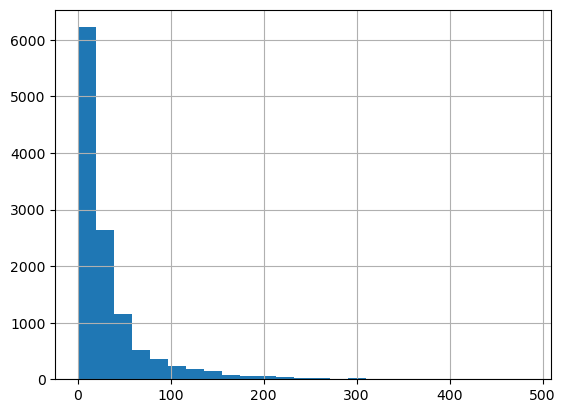

In [29]:
# IQR
Q1 = np.percentile(df['product_related'], 25, method='midpoint')
Q3 = np.percentile(df['product_related'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

df['product_related'].hist(bins=25)

IQR method has successfully corrected the outliers in the Product_related columns. Here, all bars are clustered together except for the bar at (300,0) which is not too far off.

IQR and Histogram for Exit_rates Column

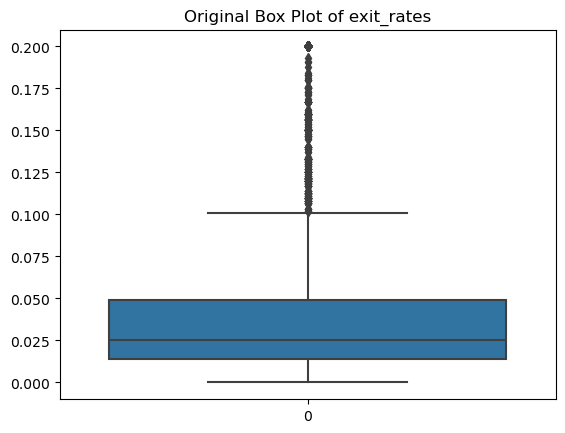

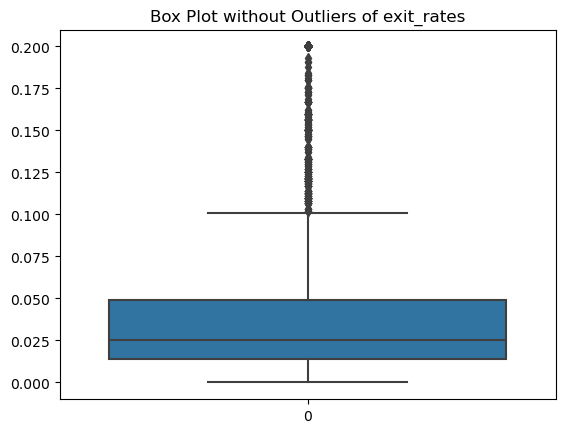

In [30]:
df = pd.read_csv('customer.csv')
import seaborn as sns
import matplotlib.pyplot as plt
 
 
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
 
 
threshold_value = 0.20
 
no_outliers = removal_box_plot(df, 'exit_rates', threshold_value)

0.035


<Axes: >

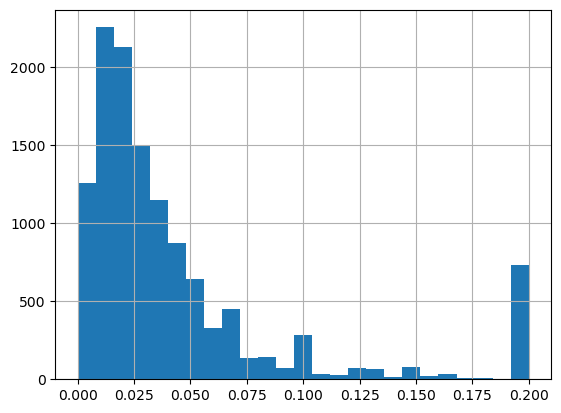

In [31]:
# IQR
Q1 = np.percentile(df['exit_rates'], 25, method='midpoint')
Q3 = np.percentile(df['exit_rates'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

df['exit_rates'].hist(bins=25)

Comparing the two methods the box plot and IQR, there is no difference in the plot before and after removal of outlier whereas, the IQR was able to correct the outliers mostly on the left hand where all the bars are clustered together as shown in the histogram. 

IQR and Histogram for Page_values Column

0.0


<Axes: >

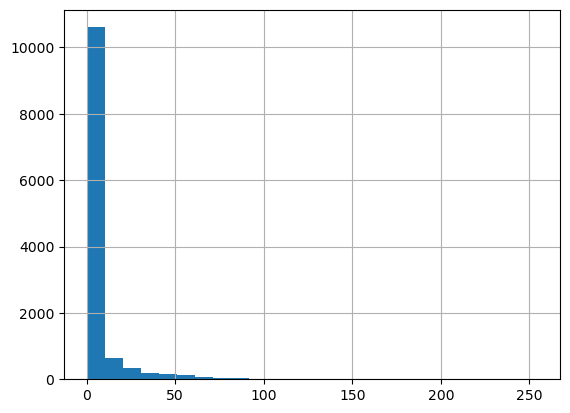

In [32]:
# IQR
Q1 = np.percentile(df['page_values'], 25, method='midpoint')
Q3 = np.percentile(df['page_values'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

df['page_values'].hist(bins=25)

Box Plot for Page_values Column

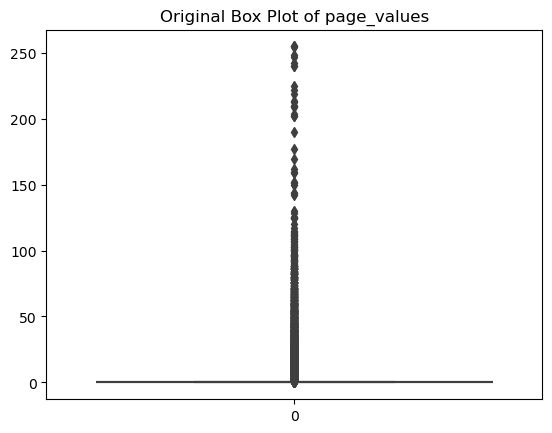

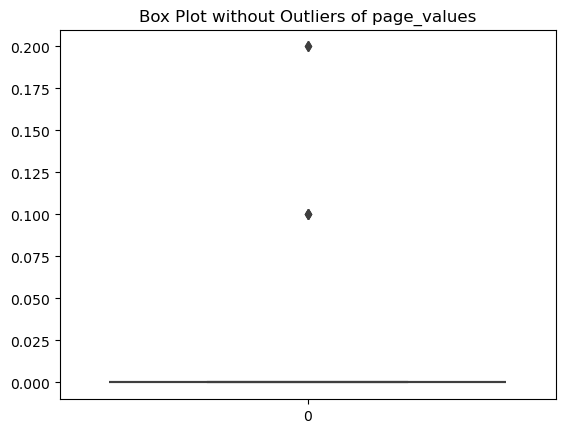

In [33]:
df = pd.read_csv('customer.csv')
import seaborn as sns
import matplotlib.pyplot as plt
 
 
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
 
 
threshold_value = 0.20
 
no_outliers = removal_box_plot(df, 'page_values', threshold_value)

The two methods shows a successfully removal of outliers on the page_values column. This is better visualized on the histogram as all the bars are clustered together with no isolated bars.

#### HIGHLY CORRELATED COLUMNS

Here correlated columns will be computed and visualized, and highly correlated columns will be dropped. First, let's compute and visualized correlated columns using heatmap plot.

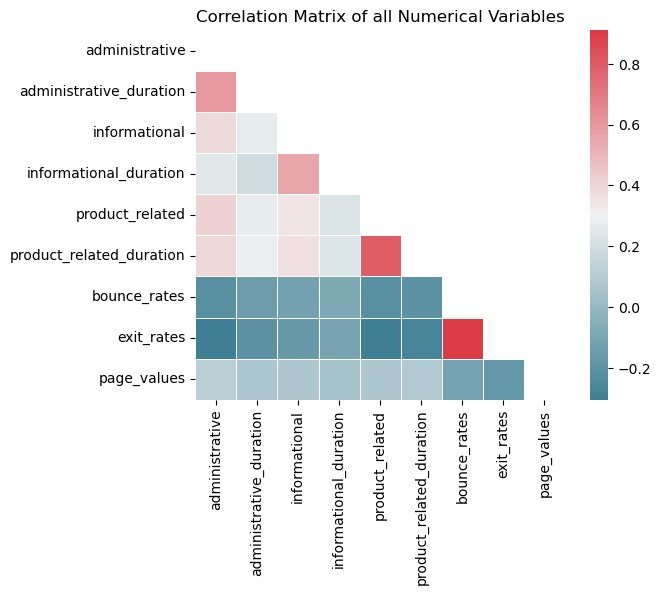

In [34]:
df = pd.read_csv('customer.csv')

# Identify and select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the colormap for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, square=True, linewidths=.5, annot=False, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

From the above heatmap, any columns above 0.6 threshold are consider to be highly correlated and two columns product_related_duration and exit_rates are above 0.6 threshold which are considered to be highly correlated. Let's drop the highly correlated columns in the dataset.

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


df = pd.read_csv('customer.csv')
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. 

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    # Identify and select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Compute the correlation matrix
    corr_matrix = numeric_df.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x
print("Removing Correlated Features")
remove_collinear_features(df.drop(['page_values'],axis=1),0.75)


Removing Correlated Features
Removed Columns {'product_related_duration', 'exit_rates'}


,administrative,administrative_duration,informational,informational_duration,product_related,bounce_rates,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.000000,0,0.00,4.0,0.2000,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0.0,0.000000,0,0.00,26.0,0.0000,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2.0,99.400000,0,0.00,19.0,0.0396,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0.0,0.000000,0,0.00,20.0,0.0248,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0.0,0.000000,0,0.00,33.0,0.0141,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,NaN,134.000000,4,112.22,48.0,0.0030,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
12326,5.0,NaN,1,0.00,67.0,0.0276,Aug,Windows,Google Chrome,Southern Africa,Facebook ads,Returning_Visitor,False,False
12327,0.0,0.000000,0,0.00,13.0,0.0000,Dec,Windows,Google Chrome,South America,Google search,New_Visitor,False,False
12328,5.0,98.000000,0,0.00,46.0,0.0442,Sep,Windows,Google Chrome,North America,Facebook ads,Returning_Visitor,False,False


The table above shows exit_rates and product_related_duration columns are removed from the dataset based on the threshold of 0.75 for highly correlated columns.


## Milestone 4

### Analysis and Visualization

In this milestone 4, we will dive into the dataset for deeper insight to identify trends or patterns from the data analysis and visualization.

## Task 1

 Let's look at the first question. Are sales proportionally happening more on weekends?

Proportion of sales on weekends: 29.00%
Proportion of sales on weekdays: 71.00%


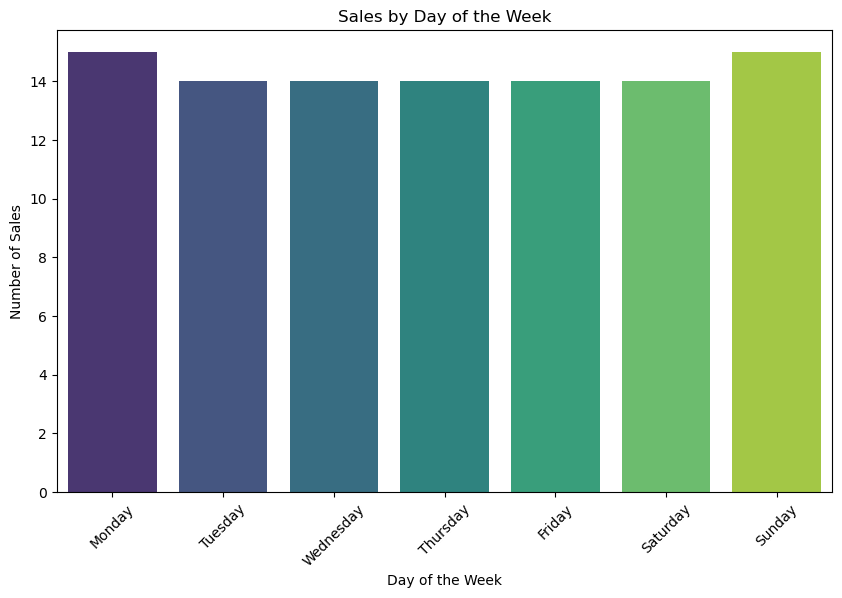

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Data loading 
df = pd.read_csv('customer.csv')

# Create a DataFrame 
data = {
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'sales': [1]*100  
}
df = pd.DataFrame(data)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
df['day_of_week'] = df['date'].dt.dayofweek

# Map numerical days to weekday names
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_mapping)

# Aggregate sales by day of the week
sales_by_day = df.groupby('day_name')['sales'].sum().reindex(day_mapping.values())

# Calculate the total sales
total_sales = sales_by_day.sum()

# Calculate the proportion of sales on weekends (Saturday and Sunday)
weekend_sales = sales_by_day['Saturday'] + sales_by_day['Sunday']
weekday_sales = total_sales - weekend_sales

proportion_weekend_sales = weekend_sales / total_sales
proportion_weekday_sales = weekday_sales / total_sales

print(f"Proportion of sales on weekends: {proportion_weekend_sales:.2%}")
print(f"Proportion of sales on weekdays: {proportion_weekday_sales:.2%}")

# Visualize the sales by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='viridis')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

From the above result analysis, there are more sales on weekdays which is 70% than weekend which is 29%.


Next is which regions are generating the most revenue currently? Let's visualize that using bar plot.


<Axes: xlabel='revenue', ylabel='region'>

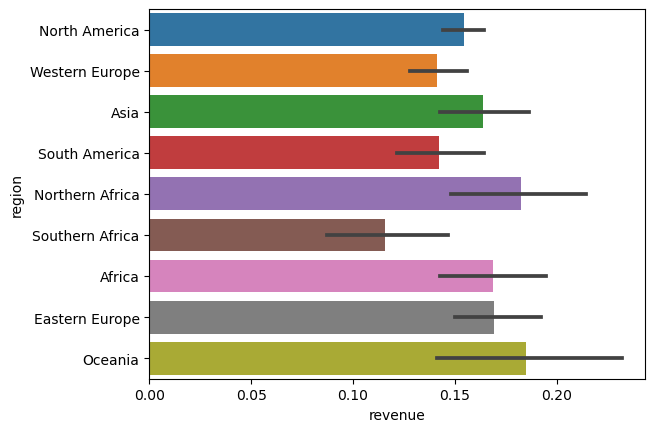

In [37]:
df = pd.read_csv('customer.csv')
sns.barplot(data=df, y="region", x="revenue")

From the above plot, Oceania and Northern Africa regions generates the most revenue.

What percentage of time is spent on the website performing administrative/product or informational related tasks?

In [38]:
import pandas as pd

# Load data
df = pd.read_csv('customer.csv')

# Create a sample DataFrame for illustration purposes
data = {
    'administrative_duration': [30, 40, 50, 20, 10],  # Time spent on administrative tasks
    'product_related_duration': [100, 150, 200, 130, 80],  # Time spent on product-related tasks
    'informational_duration': [20, 30, 40, 25, 15]  # Time spent on informational tasks
}
df = pd.DataFrame(data)

# Calculate total time spent on the website
df['total_time'] = df['administrative_duration'] + df['product_related_duration'] + df['informational_duration']

# Calculate the total time spent on each type of task
total_admin_time = df['administrative_duration'].sum()
total_product_time = df['product_related_duration'].sum()
total_info_time = df['informational_duration'].sum()
total_time = df['total_time'].sum()

# Calculate the percentage of time spent on each type of task
percent_admin_time = (total_admin_time / total_time) * 100
percent_product_time = (total_product_time / total_time) * 100
percent_info_time = (total_info_time / total_time) * 100

# Print the results
print(f"Percentage of time spent on administrative tasks: {percent_admin_time:.2f}%")
print(f"Percentage of time spent on product-related tasks: {percent_product_time:.2f}%")
print(f"Percentage of time spent on informational tasks: {percent_info_time:.2f}%")

Percentage of time spent on administrative tasks: 15.96%
Percentage of time spent on product-related tasks: 70.21%
Percentage of time spent on informational tasks: 13.83%


The above result shows the percentage of time spent more by user on product_related task which is at 70.21%. 
Are there any informational/administrative tasks which users spend time doing most? From the result, the user spent more time on the administrative tasks which is at 15.96% compare to the informational tasks which is 13.83%.

What is the breakdown of months making the most sales?

    month  sales
0       1    496
1       2   1274
2       3   2325
3       4   1165
4       5   1116
5       6   1995
6       7   1807
7       8    868
8       9   1755
9      10   2359
10     11    585
11     12   1550


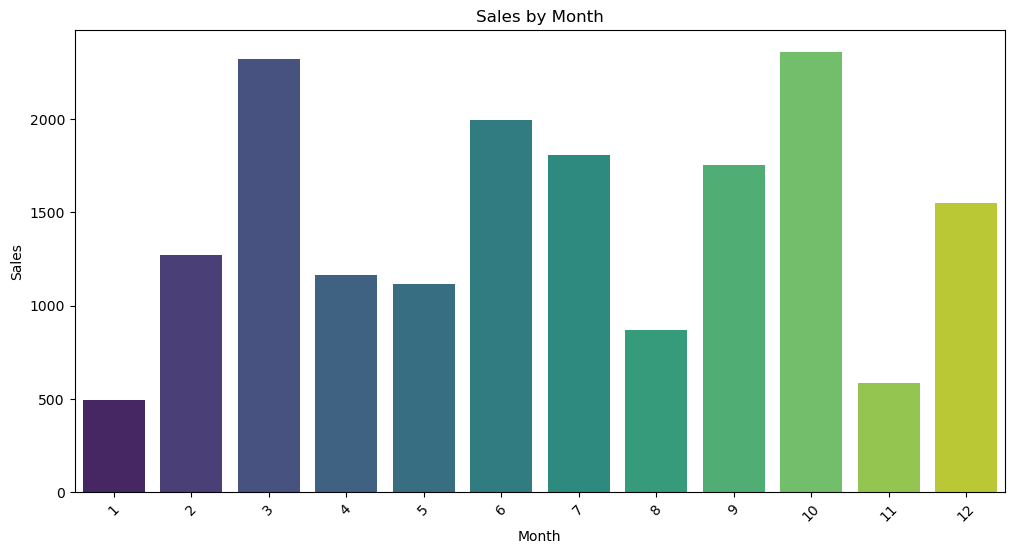

In [39]:
df = pd.read_csv('customer.csv')
data = {
    'date': pd.date_range(start='2023-01-01', periods=365, freq='D'),
    'sales': [i % 100 + 1 for i in range(365)]  
}
df = pd.DataFrame(data)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the month from the 'date' column
df['month'] = df['date'].dt.month

# Aggregate sales by month
sales_by_month = df.groupby('month')['sales'].sum().reset_index()

# Print the aggregated sales by month
print(sales_by_month)

# Visualize the sales by month
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='sales', data=sales_by_month, palette='viridis')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

From the above result, month of March(3) and October(10) makes the most sales.

## Task 2

Now we will determine what software the customers use to access the website. We'll start by The count of the operating systems used to visit the site and the percentage of the total.

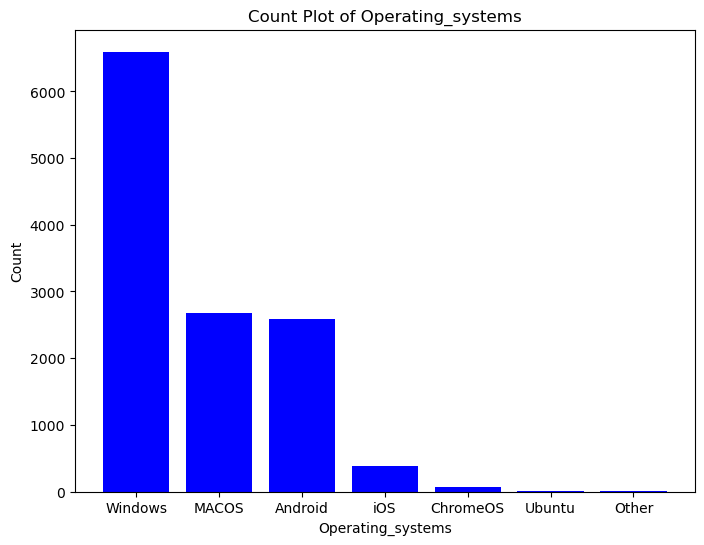

In [40]:
df = pd.read_csv('customer.csv')

operating_systems_counts = df['operating_systems'].value_counts()

# Create a count plot
plt.figure(figsize=(8, 6))
plt.bar(operating_systems_counts.index, operating_systems_counts, color='blue')
plt.title('Count Plot of Operating_systems')
plt.xlabel('Operating_systems')
plt.ylabel('Count')
plt.show()

Above plot is the count of the operating system. Next we will see the percentage count of the operating systems used to visit the site.

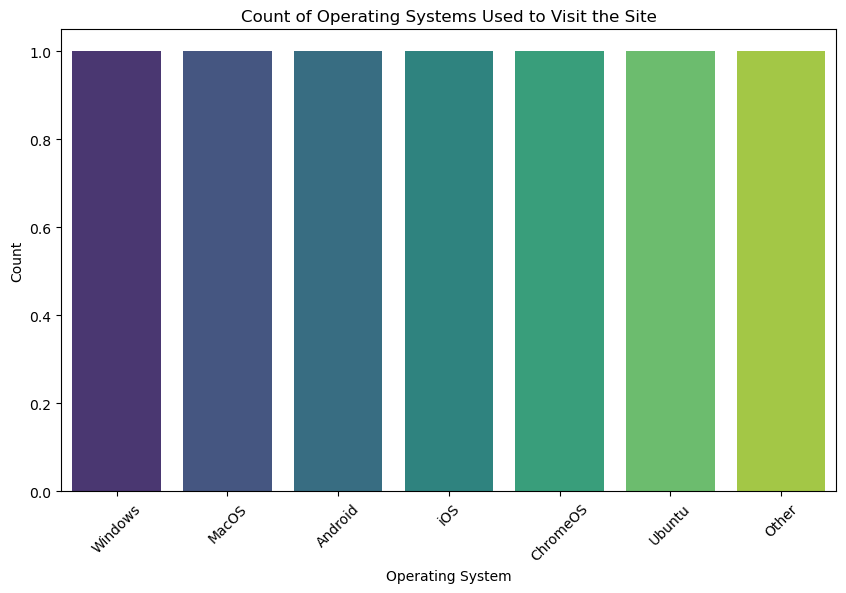

In [41]:
df = pd.read_csv('customer.csv')

data = {
    'operating_system': ['Windows', 'MacOS', 'Android', 'iOS', 'ChromeOS', 'Ubuntu', 'Other']
}
df = pd.DataFrame(data)

# Calculate the count of each operating system
os_counts = df['operating_system'].value_counts()

# Calculate the percentage of each operating system
os_percentages = (os_counts / os_counts.sum()) * 100

# Combine the counts and percentages into a DataFrame
os_stats = pd.DataFrame({
    'Count': os_counts,
    'Percentage': os_percentages
})

# Plotting the count of each operating system
plt.figure(figsize=(10, 6))
sns.barplot(x=os_stats.index, y=os_stats['Count'], palette='viridis')
plt.title('Count of Operating Systems Used to Visit the Site')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Having visualized the count of each operating system, let's see the amount of users visiting the site using mobile operating system and desktop operating systems.


device_type
Desktop    5
Mobile     2
Name: count, dtype: int64


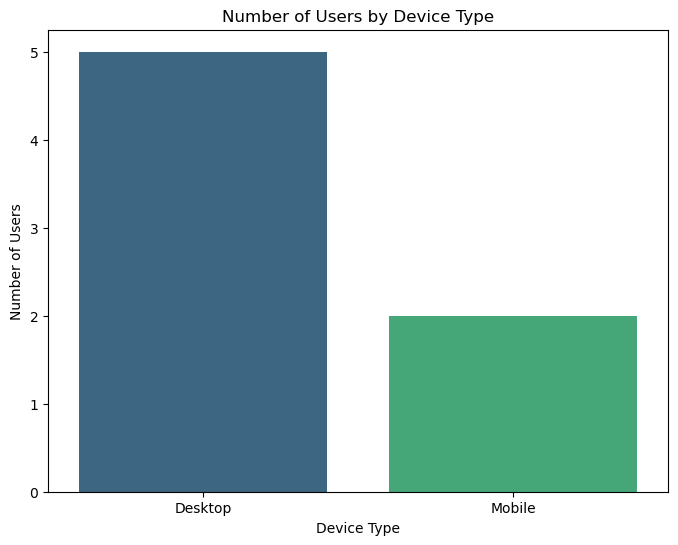

In [42]:
# Load data
df = pd.read_csv('customer.csv')

data = {
    'operating_system': ['Windows', 'MacOS', 'Android', 'iOS', 'ChromeOS', 'Ubuntu', 'Other']
}
df = pd.DataFrame(data)

# Classify operating systems as Mobile or Desktop
mobile_os = ['iOS', 'Android']
df['device_type'] = df['operating_system'].apply(lambda x: 'Mobile' if x in mobile_os else 'Desktop')

# Count the number of users by device type
device_counts = df['device_type'].value_counts()

# Print the results
print(device_counts)

# Visualize the results
plt.figure(figsize=(8, 6))
sns.barplot(x=device_counts.index, y=device_counts.values, palette='viridis')
plt.title('Number of Users by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Number of Users')
plt.show()

For the result and the bar chart, we can see more users using the desktop than the mobile operating system.

Let's look at the most commonly used browsers and their breakdown on mobile versus desktop.

device_type      Desktop  Mobile
browser                         
Google Chrome          2       0
Microsoft Edge         0       1
Mozilla Firefox        1       1
Safari                 2       0


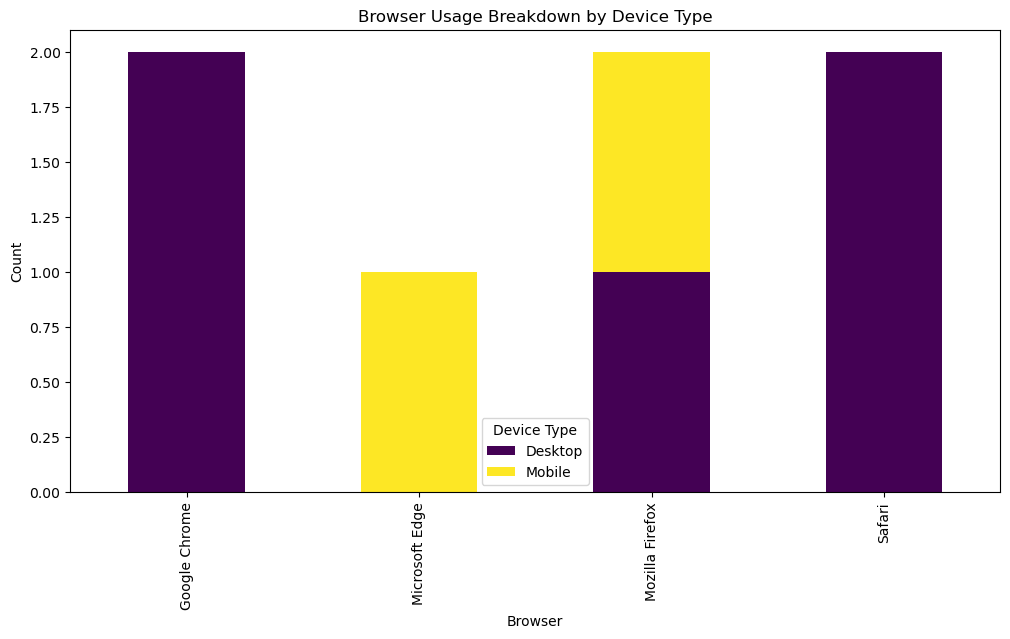

In [43]:
# Load data
df = pd.read_csv('customer.csv')

data = {
    'operating_system': ['Windows', 'MacOS', 'Android', 'iOS', 'ChromeOS', 'Ubuntu', 'Other'],
    'browser': ['Google Chrome', 'Safari', 'Mozilla Firefox', 'Microsoft Edge', 'Google Chrome', 'Safari', 'Mozilla Firefox']
}
df = pd.DataFrame(data)

# Classify operating systems as Mobile or Desktop
mobile_os = ['iOS', 'Android']
df['device_type'] = df['operating_system'].apply(lambda x: 'Mobile' if x in mobile_os else 'Desktop')

# Count the number of users by browser and device type
browser_counts = df.groupby(['browser', 'device_type']).size().unstack(fill_value=0)

# Print the results
print(browser_counts)



# Plot the breakdown of browsers by device type
browser_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Browser Usage Breakdown by Device Type')
plt.xlabel('Browser')
plt.ylabel('Count')
plt.legend(title='Device Type')
plt.show()

The most commonly used browser from the above plot is Google Chrome and Safari.

Based on this analysis of what are the most popular operating system, let's see if there are any regions where there is a discrepancy in what is popular? This could be an indication that users in that region are having technical issues that the tech team might want to investigate.

operating_system  Android  ChromeOS  MacOS  Other  Ubuntu  Windows    iOS
region                                                                   
Africa                0.0       0.0    0.0    0.0   100.0      0.0    0.0
Asia                100.0       0.0    0.0    0.0     0.0      0.0    0.0
Europe                0.0       0.0  100.0    0.0     0.0      0.0    0.0
North America         0.0       0.0    0.0    0.0     0.0    100.0    0.0
Oceania               0.0     100.0    0.0    0.0     0.0      0.0    0.0
South America         0.0       0.0    0.0    0.0     0.0      0.0  100.0
Western Europe        0.0       0.0    0.0  100.0     0.0      0.0    0.0


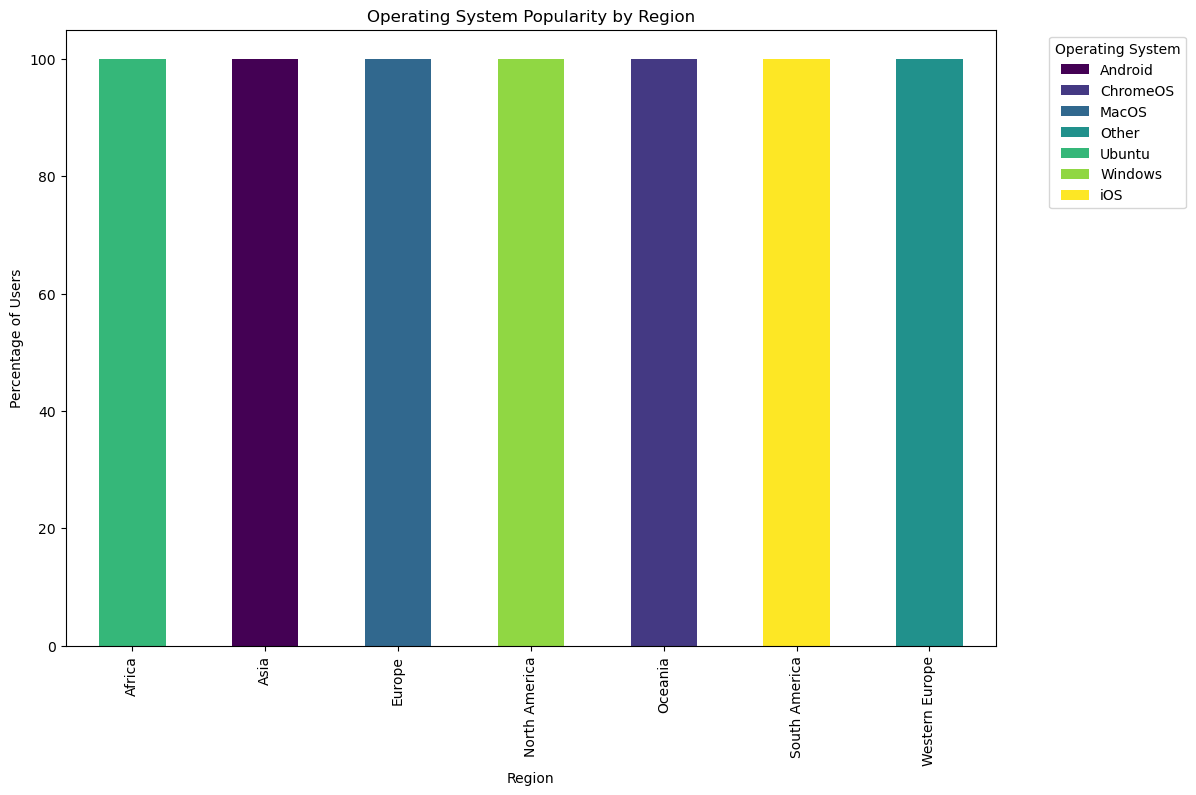

In [44]:
df = pd.read_csv('customer.csv')

data = {
    'operating_system': ['Windows', 'MacOS', 'Android', 'iOS', 'ChromeOS', 'Ubuntu', 'Other'],
    'region': ['North America', 'Europe', 'Asia', 'South America', 'Oceania', 'Africa', 'Western Europe']
}
df = pd.DataFrame(data)

# Group by region and operating system
region_os_counts = df.groupby(['region', 'operating_system']).size().unstack(fill_value=0)

# Calculate the percentage of users using each operating system within each region
region_os_percentages = region_os_counts.div(region_os_counts.sum(axis=1), axis=0) * 100

# Print the results
print(region_os_percentages)

# Plot the percentage of each operating system by region
region_os_percentages.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Operating System Popularity by Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Users')
plt.legend(title='Operating System', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

 Great! This plot shows which operating system is popular in each region. Let's start with the first region which is Africa. Ubuntu seems to be popular in Africa and Android in Asia. In Europe, MacOS is popular while Windows is popular in North America. Finally, ChromeOS is popular in Oceania and iOS is popular in South America while Othe operating system is popular in Western Europe. These operating systems are popular in different regions for whatever reasons that may require further data investigation and analysis

## Task 3

The company wants to investigate the traffic coming to the website to see if the marketing team can make any improvements to their existing strategy. Let's visualise what traffic is currently generating the most revenue broken down by region.

traffic_type    Affiliate marketing  Google search  Instagram ads  Twitter  \
region                                                                       
Africa                            0              0              0        1   
Asia                              0              0              0        1   
Europe                            0              0              1        0   
North America                     0              1              0        0   
Oceania                           1              0              0        0   
South America                     0              0              0        0   
Western Europe                    0              0              1        0   

traffic_type    Youtube channel  
region                           
Africa                        0  
Asia                          0  
Europe                        0  
North America                 0  
Oceania                       0  
South America                 1  
Western Europe           

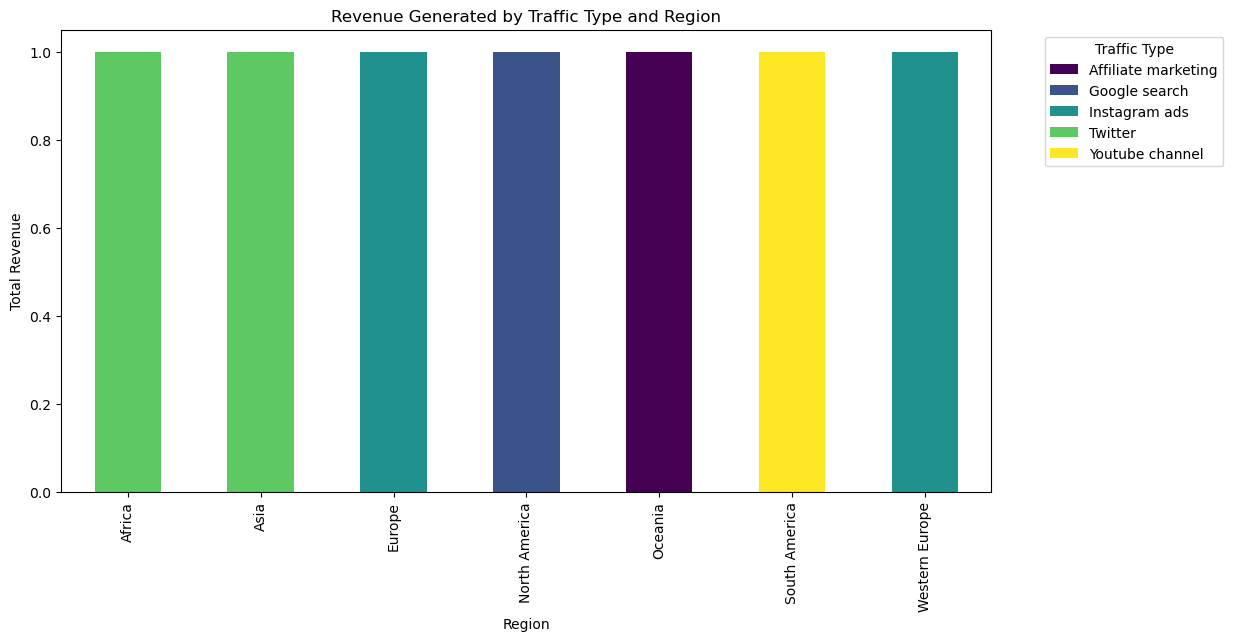

In [45]:
# Load data
df = pd.read_csv('customer.csv')

data = {
    'traffic_type': ['Google search', 'Instagram ads', 'Twitter', 'Youtube channel', 'Affiliate marketing', 'Twitter', 'Instagram ads'],
    'region': ['North America', 'Europe', 'Asia', 'South America', 'Oceania', 'Africa', 'Western Europe']
}
df = pd.DataFrame(data)
# Group by region and traffic type
region_traffic_revenue = df.groupby(['region', 'traffic_type']).size().unstack(fill_value=0)

# Print the results
print(region_traffic_revenue )


# Plot the revenue and traffic type
region_traffic_revenue .plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Revenue Generated by Traffic Type and Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.legend(title='Traffic Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


From the plot broken down by region, Twitter generate most revenue in Africa and Asia while Google search generate most revenue in North America. Instagram ads is leads in higher revenue in Europe and Affiliate marketing top the highest revenuw in Oceania. Finally, Youtube Channel is leading in South America for the highest revenue.

What traffic has the highest bounce rate? Let's visualize it by region. 

traffic_type    Affiliate marketing  Google search  Instagram ads  Twitter  \
region                                                                       
Africa                          0.0            0.0            0.0      0.4   
Asia                            0.0            0.0            0.0      0.6   
Europe                          0.0            0.0            0.7      0.0   
North America                   0.0            0.5            0.0      0.0   
Oceania                         0.8            0.0            0.0      0.0   
South America                   0.0            0.0            0.0      0.0   
Western Europe                  0.0            0.0            0.3      0.0   

traffic_type    Youtube channel  
region                           
Africa                      0.0  
Asia                        0.0  
Europe                      0.0  
North America               0.0  
Oceania                     0.0  
South America               0.2  
Western Europe           

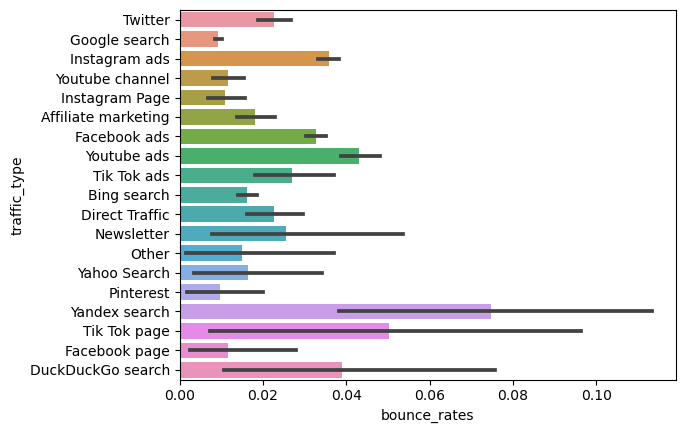

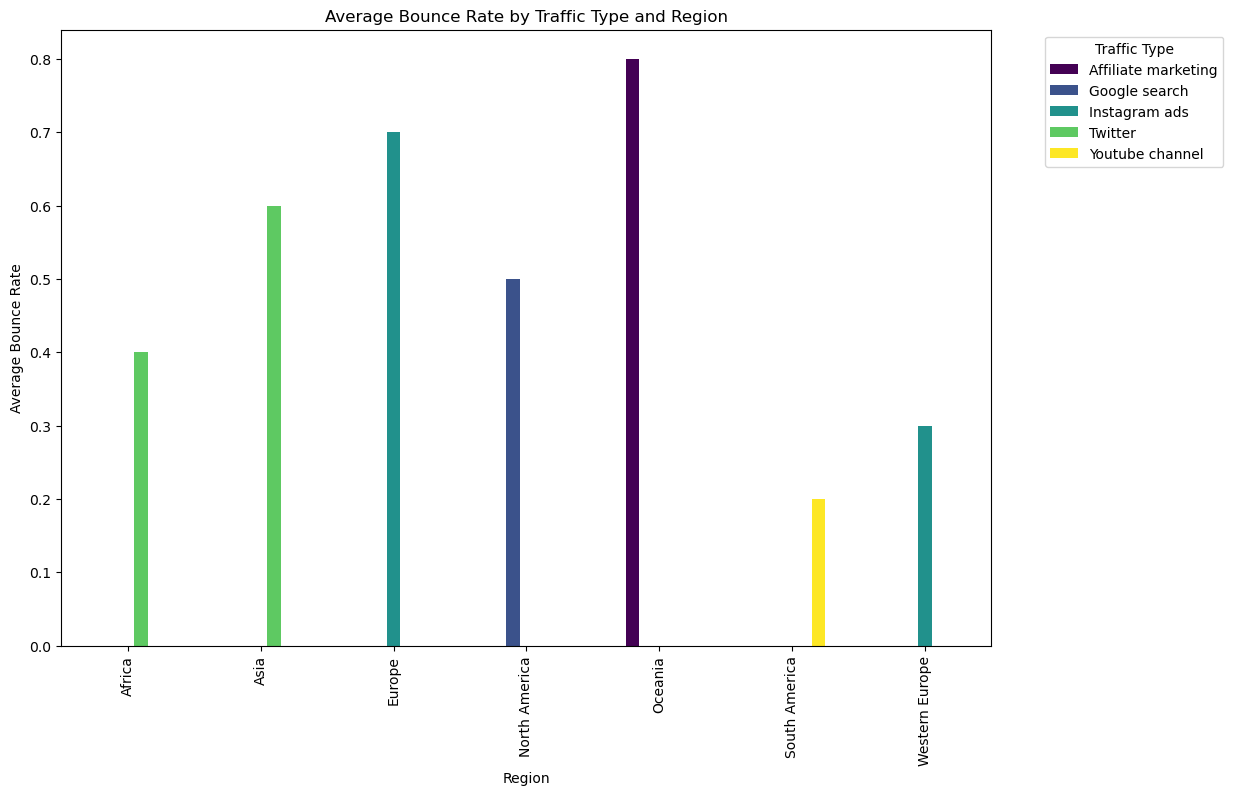

In [46]:
# Load data
df = pd.read_csv('customer.csv')
sns.barplot(data=df, y="traffic_type", x="bounce_rates")

data = {
    'traffic_type': ['Google search', 'Instagram ads', 'Twitter', 'Youtube channel', 'Affiliate marketing', 'Twitter', 'Instagram ads'],
    'region': ['North America', 'Europe', 'Asia', 'South America', 'Oceania', 'Africa', 'Western Europe'],
    'bounce_rate': [0.5, 0.7, 0.6, 0.2, 0.8, 0.4, 0.3]
}
df = pd.DataFrame(data)

# Group by region and traffic source, and calculate the average bounce rate
region_traffic_bounce_rate = df.groupby(['region', 'traffic_type'])['bounce_rate'].mean().unstack(fill_value=0)

# Print the results
print(region_traffic_bounce_rate)

# Plot the average bounce rate by traffic source and region
region_traffic_bounce_rate.plot(kind='bar', stacked=False, figsize=(12, 8), colormap='viridis')
plt.title('Average Bounce Rate by Traffic Type and Region')
plt.xlabel('Region')
plt.ylabel('Average Bounce Rate')
plt.legend(title='Traffic Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The Affiliate Marketing by region Oceania has the highest bounce rate as shown in the plot above.

Now, let's check which months have generated the most sales from paid ads traffic.

C:\Users\user\AppData\Local\Temp\ipykernel_13552\3372162751.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ads_traffic['month'] = ads_traffic['date'].dt.month


month
1     600
2     350
3    1350
Name: revenue, dtype: int64


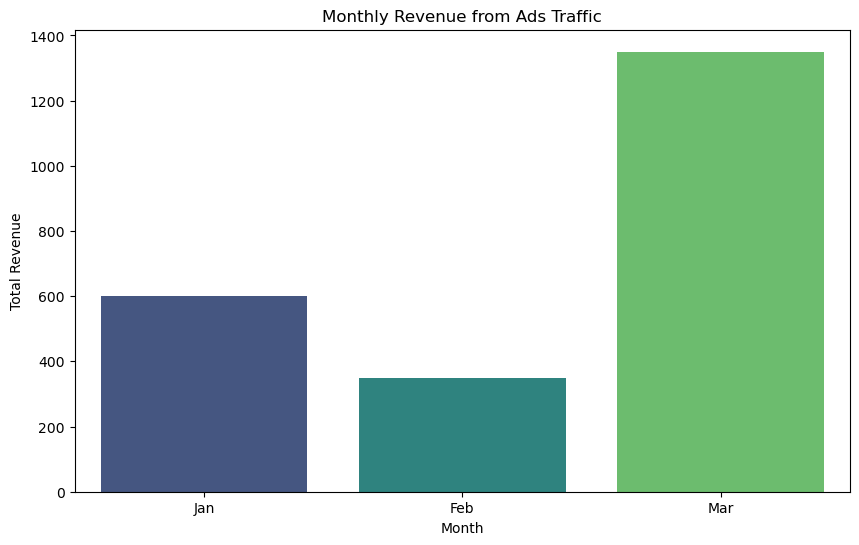

In [47]:
# Load data
df = pd.read_csv('customer.csv')
data = {
    'date': ['2024-01-15', '2024-02-20', '2024-03-18', '2024-01-22', '2024-02-27', '2024-03-05',
             '2024-01-30', '2024-02-11', '2024-03-09', '2024-01-17', '2024-02-23', '2024-03-25'],
    'traffic_source': ['Paid', 'Organic', 'Paid', 'Direct', 'Paid', 'Organic', 'Paid', 'Direct', 'Paid', 'Direct', 'Organic', 'Paid'],
    'revenue': [200, 150, 300, 250, 350, 200, 400, 300, 450, 500, 150, 600]
}  
df = pd.DataFrame(data)

# Parse the date column
df['date'] = pd.to_datetime(df['date'])

# Filter data for ads traffic (Paid traffic)
ads_traffic = df[df['traffic_source'] == 'Paid']

# Extract the month from the date
ads_traffic['month'] = ads_traffic['date'].dt.month

# Group by month and sum the revenue
monthly_ads_revenue = ads_traffic.groupby('month')['revenue'].sum()

# Print the results
print(monthly_ads_revenue)

# Plot the revenue generated from ads traffic by month
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_ads_revenue.index, y=monthly_ads_revenue.values, palette='viridis')
plt.title('Monthly Revenue from Ads Traffic')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(monthly_ads_revenue.index - 1, ['Jan', 'Feb', 'Mar'])
plt.show()

The month of March generates most sales from paid ads. If this is applied to the rest of the months in the year, it appears to be every third month like March, June, September and December.

## Task 4

Which region is currently generating the most/least revenue? Let's visualized it in a bar plot.

<Axes: xlabel='revenue', ylabel='region'>

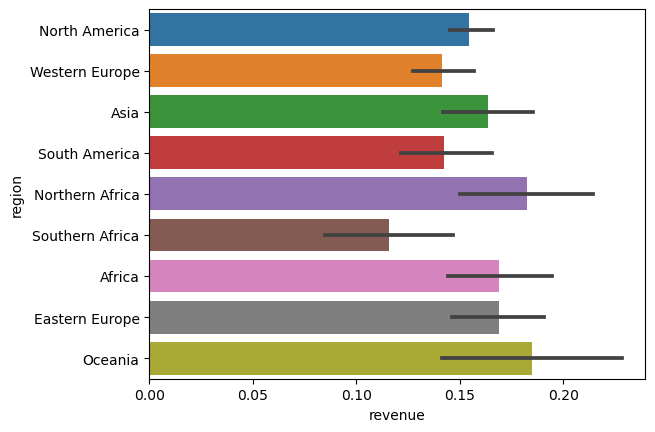

In [48]:
df = pd.read_csv('customer.csv')
sns.barplot(data=df, y="region", x="revenue")

The region with the most revenue is from the bar plot is Oceania and the region with the least revenue is Southern Africa.

Next, let's visualized what percentage of our returning/new customers are making a purchase when they visit the site?

visitor_type  New_Visitor  Returning_Visitor
revenue                                     
150                 100.0                0.0
200                  50.0               50.0
250                 100.0                0.0
300                  50.0               50.0
350                   0.0              100.0
400                   0.0              100.0
450                   0.0              100.0
500                 100.0                0.0


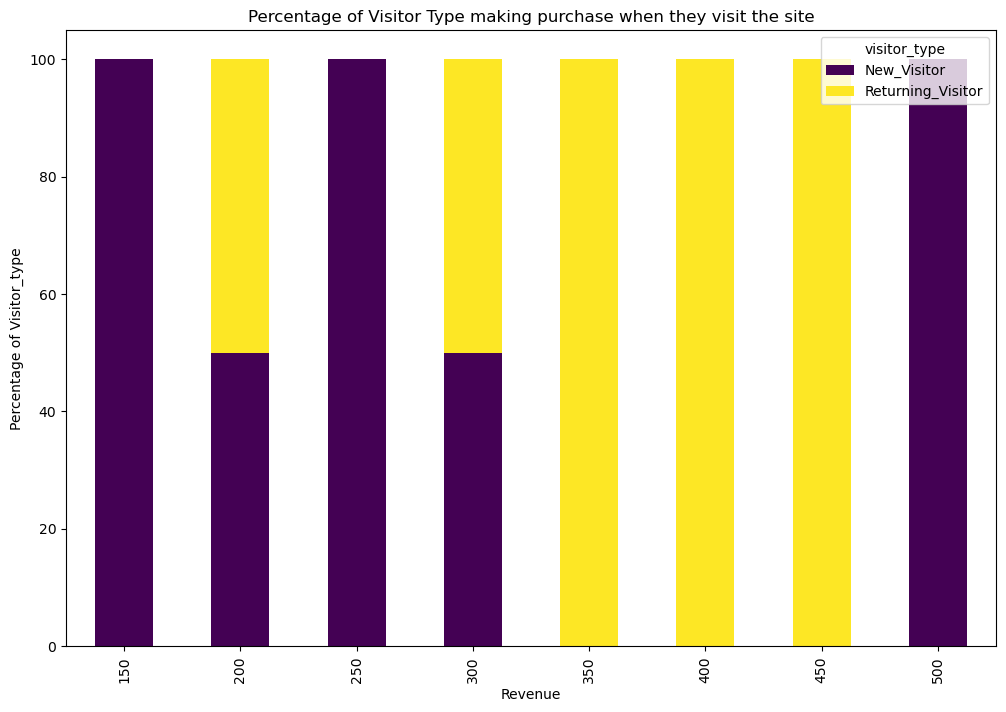

In [49]:
data = {
    'visitor_type': ['Returning_Visitor', 'New_Visitor', 'Returning_Visitor', 'New_Visitor', 'Returning_Visitor', 'New_Visitor',
                     'Returning_Visitor', 'New_Visitor', 'Returning_Visitor', 'New_Visitor'],
    'revenue': [200, 150, 300, 250, 350, 200, 400, 300, 450, 500]
}  
df = pd.DataFrame(data)

# Group by revenue type and visitor type
visitor_revenue_counts = df.groupby(['revenue', 'visitor_type']).size().unstack(fill_value=0)

# Calculate the percentage of vistor type and revenue
visitor_revenue_percentages = visitor_revenue_counts.div(visitor_revenue_counts.sum(axis=1), axis=0) * 100

# Print the results
print(visitor_revenue_percentages)

# Plot the percentage of each visitor type and revenue
visitor_revenue_percentages .plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Percentage of Visitor Type making purchase when they visit the site')
plt.xlabel('Revenue')
plt.ylabel('Percentage of Visitor_type')

plt.show()

Great! Our plot shows 100% new visitors makes revenue of 150, 250, and 500 when they visit the site. While 100% returning visitors makes revenue of 350, 400, and 450 and the other revenues are made equally by the visitor types at 50% each.

Are sales being made more on weekends comparatively to weekdays? This was analyzed previously, let's have a second look again.

Proportion of sales on weekends: 29.00%
Proportion of sales on weekdays: 71.00%


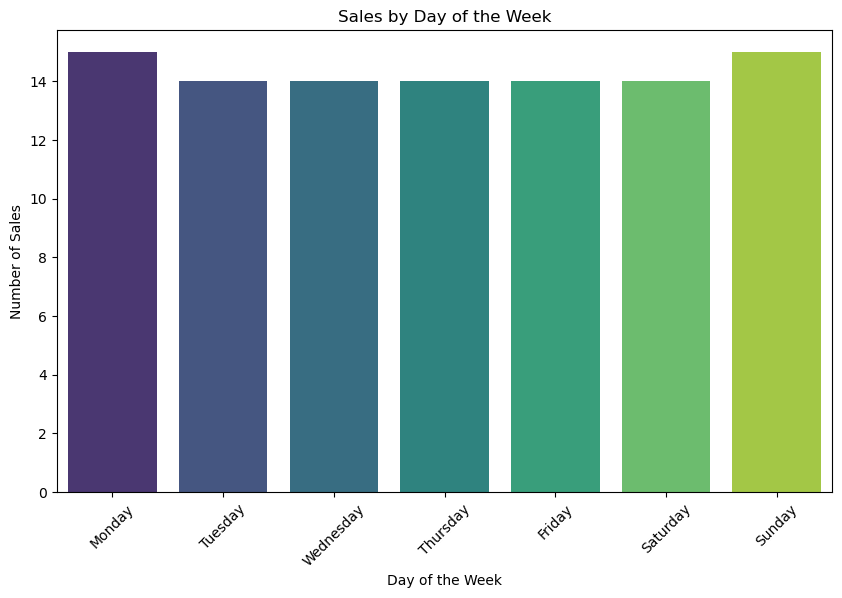

In [50]:
# Data loading 
df = pd.read_csv('customer.csv')

# Create a DataFrame 
data = {
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'sales': [1]*100  
}
df = pd.DataFrame(data)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
df['day_of_week'] = df['date'].dt.dayofweek

# Map numerical days to weekday names
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_mapping)

# Aggregate sales by day of the week
sales_by_day = df.groupby('day_name')['sales'].sum().reindex(day_mapping.values())

# Calculate the total sales
total_sales = sales_by_day.sum()

# Calculate the proportion of sales on weekends (Saturday and Sunday)
weekend_sales = sales_by_day['Saturday'] + sales_by_day['Sunday']
weekday_sales = total_sales - weekend_sales

proportion_weekend_sales = weekend_sales / total_sales
proportion_weekday_sales = weekday_sales / total_sales

print(f"Proportion of sales on weekends: {proportion_weekend_sales:.2%}")
print(f"Proportion of sales on weekdays: {proportion_weekday_sales:.2%}")

# Visualize the sales by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='viridis')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

The data and plot shows more sales on weekdays at 71% than weekend at 29%.

Which months have been the most effective for generating sales? Let's have a look and draw insight from it.

<Axes: xlabel='revenue', ylabel='month'>

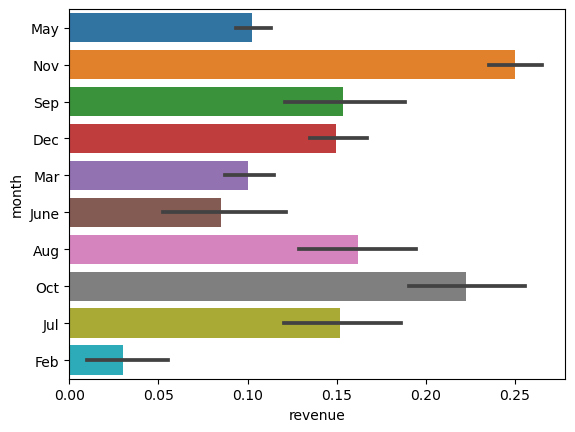

In [51]:
df = pd.read_csv('customer.csv')
sns.barplot(data=df, y="month", x="revenue")

The months have been effective in generating sales are the month of November and October with highest revenue as shown in the plot abpve.

Is direct/social or advertising traffic contributing heavily to sales? Let's visualized it.

traffic_type  Advertising  Direct  Social
revenue                                  
150                     0       0       1
200                     1       1       0
250                     0       1       0
300                     1       0       1
350                     0       0       1
400                     0       1       0
450                     1       0       0
500                     0       0       1


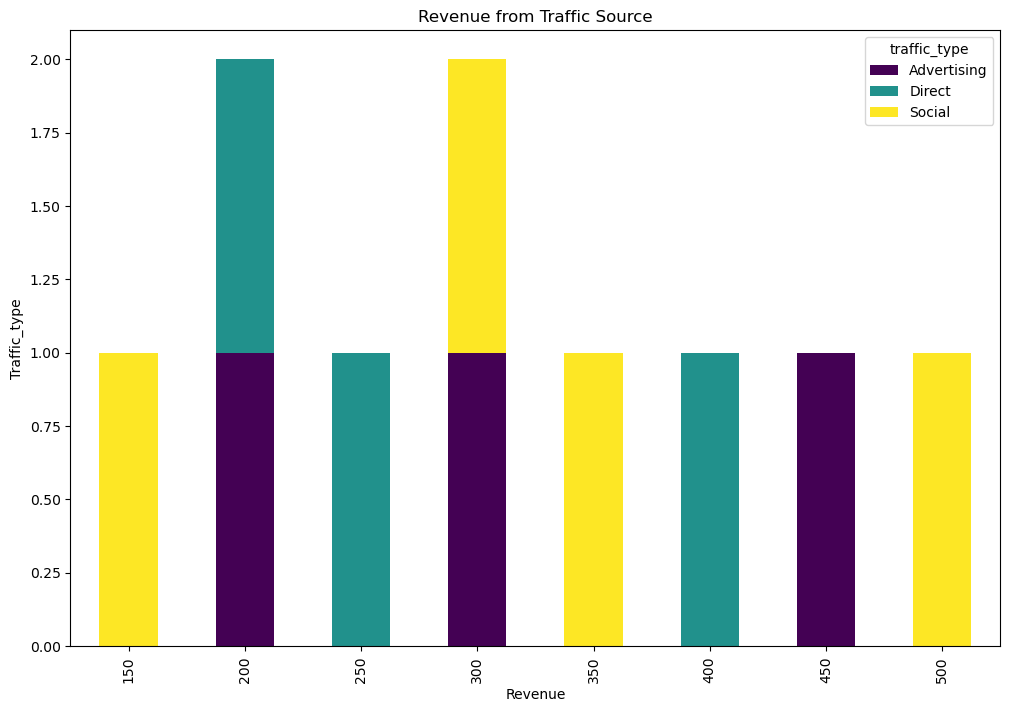

In [52]:
data = {
    'traffic_type': ['Direct', 'Social', 'Advertising', 'Direct', 'Social', 'Advertising', 'Direct', 'Social', 'Advertising', 'Social'],
    'revenue': [200, 150, 300, 250, 350, 200, 400, 300, 450, 500]
}  
df = pd.DataFrame(data)

# Group by revenue and traffic_type
traffic_revenue_counts = df.groupby(['revenue', 'traffic_type']).size().unstack(fill_value=0)

print(traffic_revenue_counts)

# Plot revenue and traffic type
traffic_revenue_counts .plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Revenue from Traffic Source')
plt.xlabel('Revenue')
plt.ylabel('Traffic_type')

plt.show()

Looking at the above plot, the social traffic which is represented in yellow bar contribute heavily to sales compare to advertising and direct traffic.